# 模型建立

In [226]:
import pandas as pd
import numpy as np

data=pd.read_excel('new_data.xlsx')

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Change(Pips)'}>,
        <Axes: title={'center': 'Change(%)'}>]], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


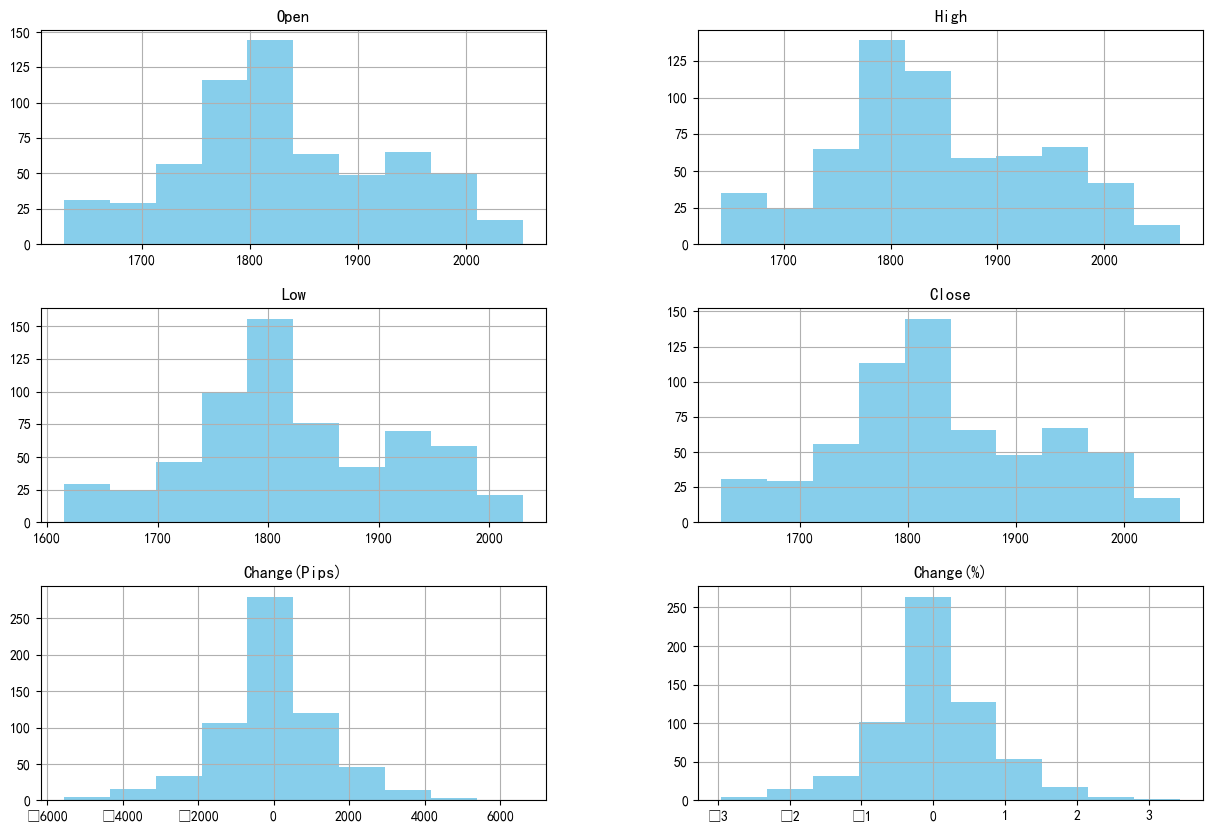

In [116]:
#各列数据分布直方图
data[[ 'Open', 'High', 'Low', 'Close','Change(Pips)', 'Change(%)']].hist(figsize=(15,10),color='skyblue')

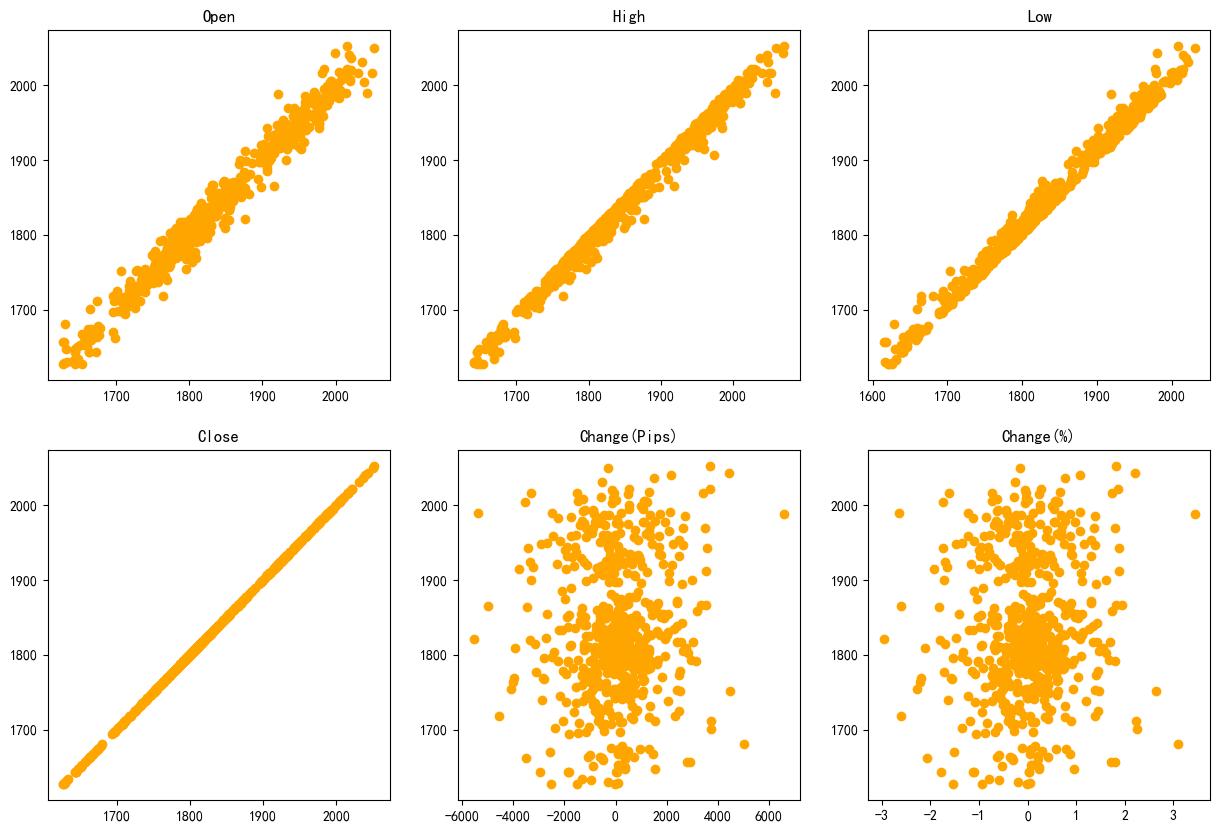

In [227]:
#查看每一列数据与Close列数据的相关系关系散点图
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #设置y轴负号显示

import math
columns=[ 'Open', 'High', 'Low', 'Close','Change(Pips)', 'Change(%)']
cols=3
rows=2
plt.figure(figsize=(15,10))
for idx in range(6):
    plt.subplot(rows,cols,idx+1)
    plt.scatter(data[columns[idx]],data['Close'],color='orange')
    plt.title(columns[idx])

In [118]:
from sklearn.model_selection import train_test_split
# 筛选特征值和目标值
x=data[['Open','High','Low']]
#数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, data.Close,random_state=22)
print("训练集的特征值：\n", x_train, x_train.shape)
print("测试集的特征值：\n", y_train, y_train.shape)

训练集的特征值：
         Open     High      Low
267  1812.49  1829.23  1787.05
594  1977.15  1983.42  1947.40
215  1917.19  1929.10  1895.19
587  1960.03  1964.62  1938.60
199  1906.36  1921.06  1882.70
..       ...      ...      ...
491  1928.03  1955.95  1920.84
502  1854.94  1859.98  1830.72
358  1739.46  1740.46  1720.91
356  1737.56  1739.60  1733.90
132  1780.89  1787.49  1772.26

[466 rows x 3 columns] (466, 3)
测试集的特征值：
 267    1826.38
594    1948.00
215    1926.83
587    1940.37
199    1889.02
        ...   
491    1953.03
502    1836.51
358    1723.24
356    1734.59
132    1784.61
Name: Close, Length: 466, dtype: float64 (466,)


In [119]:
# 特征工程：标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
print(x_test)

[[-0.48996797 -0.52540538 -0.43017226]
 [-2.05146543 -2.11142649 -1.97790308]
 [-0.265716   -0.35866065 -0.32083862]
 [ 0.72932267  1.06577062  0.79996527]
 [-0.29634398 -0.1659311  -0.19498155]
 [-0.36936365 -0.41946725 -0.36622442]
 [-0.89194706 -0.88761489 -0.82576904]
 [-1.00947799 -1.09212703 -0.92855768]
 [-1.36238871 -1.46790757 -1.47683529]
 [-0.04559721 -0.05115603 -0.08199988]
 [-0.65699118 -0.69593736 -0.71525516]
 [-0.6895268  -0.7046691  -0.75860235]
 [-1.26668949 -1.01227893 -1.28939087]
 [-1.09722876 -1.08465771 -1.14733225]
 [ 0.8993133   0.7772023   0.97056437]
 [ 0.11411344  0.00344366 -0.26654734]
 [ 0.06451518  0.05604452  0.08924299]
 [ 0.15438553  0.09686279  0.12400658]
 [ 1.21926449  1.13688698  1.09824546]
 [-0.5942515  -0.66732249 -0.61203734]
 [ 0.17611127  0.06225142  0.15726804]
 [-0.27440629 -0.35276936 -0.30699756]
 [-0.57432741 -0.68236634 -0.51332591]
 [-0.7236521  -0.65459309 -0.64991248]
 [-0.09784495 -0.17697728 -0.30560273]
 [-1.86250453 -1.77173014

In [120]:
#为回归问题，选择线性回归梯度下降模型
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error 

estimator = SGDRegressor()
estimator.fit(x_train, y_train)

print("梯度下降-权重系数为：\n", estimator.coef_)
print("梯度下降-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
# print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("梯度下降-均方误差为：\n", error)

梯度下降-权重系数为：
 [-30.58997017  64.98228081  59.80632652]
梯度下降-偏置为：
 [1837.92041755]
梯度下降-均方误差为：
 43.64210912506325


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [121]:
#分别计算训练集和测试集的拟合优质
print('Traing set score:{:.2f}'.format(estimator.score(x_train,y_train)))
print('Test set score:{:.2f}'.format(estimator.score(x_test,y_test)))

Traing set score:0.99
Test set score:0.99


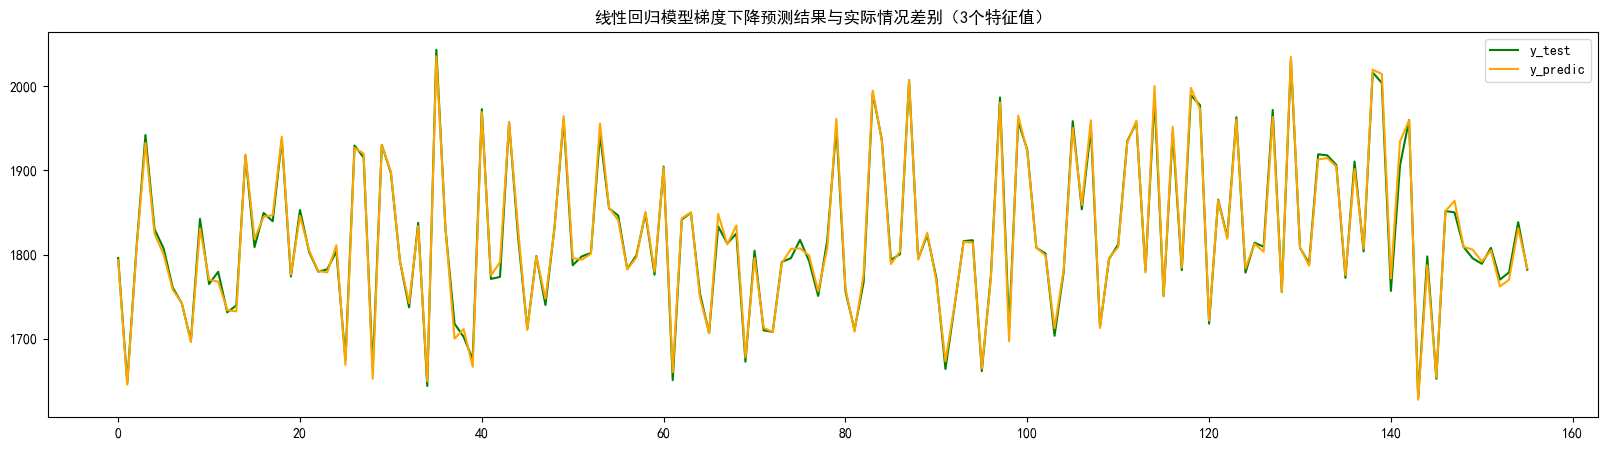

In [122]:
#可视化展示模型预测结果与实际情况的差别
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,x_test.shape[0]),y_test,color='green',label='y_test')
plt.plot(np.arange(0,x_test.shape[0]),y_predict,color='orange',label='y_predic')
plt.title('线性回归模型梯度下降预测结果与实际情况差别（3个特征值）')
plt.legend()

In [123]:
# 筛选特征值和目标值
x=data[['Open','High','Low','Change(Pips)','Change(%)']]
#数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, data.Close,random_state=22)
print("训练集的特征值：\n", x_train, x_train.shape)
print("测试集的特征值：\n", y_train, y_train.shape)

训练集的特征值：
         Open     High      Low  Change(Pips)  Change(%)
267  1812.49  1829.23  1787.05          1389       0.77
594  1977.15  1983.42  1947.40         -2915      -1.47
215  1917.19  1929.10  1895.19           963       0.50
587  1960.03  1964.62  1938.60         -1966      -1.00
199  1906.36  1921.06  1882.70         -1733      -0.91
..       ...      ...      ...           ...        ...
491  1928.03  1955.95  1920.84          2500       1.30
502  1854.94  1859.98  1830.72         -1843      -0.99
358  1739.46  1740.46  1720.91         -1622      -0.93
356  1737.56  1739.60  1733.90          -297      -0.17
132  1780.89  1787.49  1772.26           371       0.21

[466 rows x 5 columns] (466, 5)
测试集的特征值：
 267    1826.38
594    1948.00
215    1926.83
587    1940.37
199    1889.02
        ...   
491    1953.03
502    1836.51
358    1723.24
356    1734.59
132    1784.61
Name: Close, Length: 466, dtype: float64 (466,)


In [124]:
# 特征工程：标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
print(x_test)

[[-4.89967972e-01 -5.25405376e-01 -4.30172258e-01  2.82877731e-01
   2.91775675e-01]
 [-2.05146543e+00 -2.11142649e+00 -1.97790308e+00  2.19633244e-01
   2.42287971e-01]
 [-2.65715996e-01 -3.58660652e-01 -3.20838621e-01 -4.80765809e-01
  -4.87655650e-01]
 [ 7.29322667e-01  1.06577062e+00  7.99965274e-01  2.38205645e+00
   2.29602765e+00]
 [-2.96343983e-01 -1.65931104e-01 -1.94981550e-01  1.35265150e+00
   1.36813322e+00]
 [-3.69363648e-01 -4.19467246e-01 -3.66224420e-01  2.79513662e-01
   2.79403749e-01]
 [-8.91947059e-01 -8.87614894e-01 -8.25769038e-01  4.68574310e-01
   4.89726487e-01]
 [-1.00947799e+00 -1.09212703e+00 -9.28557678e-01 -4.20912823e-02
  -4.22663216e-02]
 [-1.36238871e+00 -1.46790757e+00 -1.47683529e+00 -8.04389195e-01
  -8.71185349e-01]
 [-4.55972075e-02 -5.11560288e-02 -8.19998822e-02  5.86316706e-01
   5.88701893e-01]
 [-6.56991184e-01 -6.95937362e-01 -7.15255156e-01 -7.43835963e-01
  -7.72209943e-01]
 [-6.89526797e-01 -7.04669105e-01 -7.58602349e-01  4.49062713e-01

In [125]:
#为回归问题，选择线性回归梯度下降模型
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

estimator = SGDRegressor()
estimator.fit(x_train, y_train)

print("梯度下降-权重系数为：\n", estimator.coef_)
print("梯度下降-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("梯度下降-均方误差为：\n", error)

梯度下降-权重系数为：
 [41.45240608 26.26328808 26.61713894  6.55632577  4.05143812]
梯度下降-偏置为：
 [1837.91612548]
梯度下降-均方误差为：
 5.299902873264905


In [126]:
#分别计算训练集和测试集的拟合优质
print('Traing set score:{:.2f}'.format(estimator.score(x_train,y_train)))
print('Test set score:{:.2f}'.format(estimator.score(x_test,y_test)))

Traing set score:1.00
Test set score:1.00


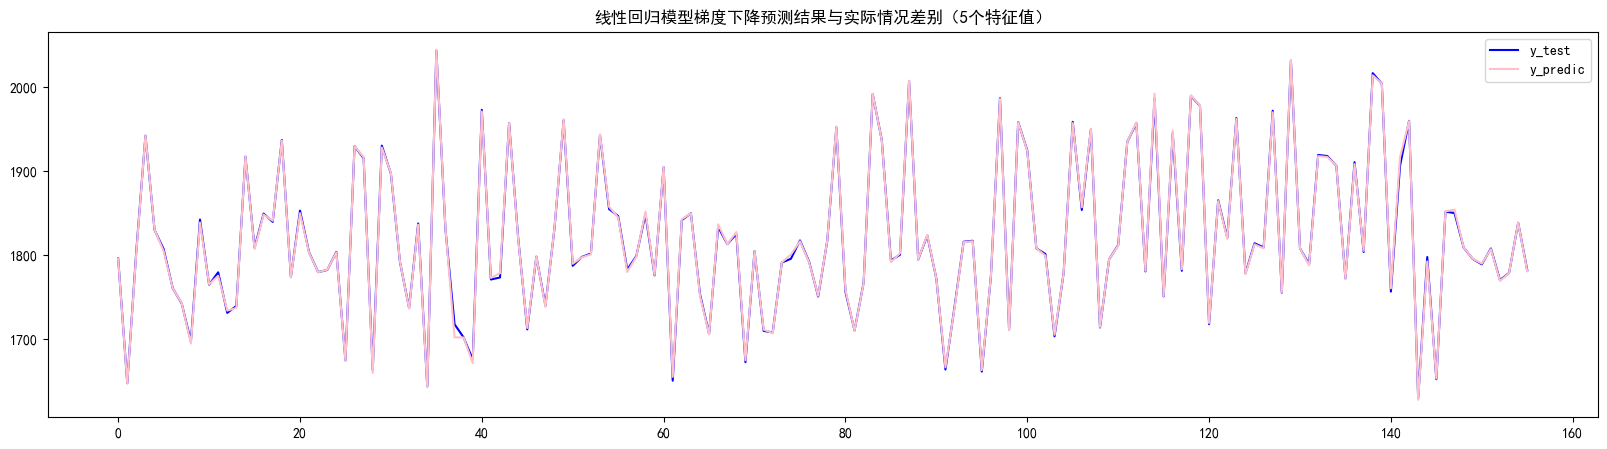

In [127]:
#可视化展示模型预测结果与实际情况的差别
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,x_test.shape[0]),y_test,color='blue',label='y_test')
plt.plot(np.arange(0,x_test.shape[0]),y_predict,color='pink',label='y_predic')
plt.title('线性回归模型梯度下降预测结果与实际情况差别（5个特征值）')
plt.legend()

In [128]:
from sklearn.model_selection import train_test_split
# 筛选特征值和目标值
x=data[['Open','High','Low','Change(Pips)','Change(%)']]
#数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, data.Close,random_state=22)
print("训练集的特征值：\n", x_train, x_train.shape)
print("测试集的特征值：\n", y_train, y_train.shape)

# 特征工程：标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
print(x_test)

训练集的特征值：
         Open     High      Low  Change(Pips)  Change(%)
267  1812.49  1829.23  1787.05          1389       0.77
594  1977.15  1983.42  1947.40         -2915      -1.47
215  1917.19  1929.10  1895.19           963       0.50
587  1960.03  1964.62  1938.60         -1966      -1.00
199  1906.36  1921.06  1882.70         -1733      -0.91
..       ...      ...      ...           ...        ...
491  1928.03  1955.95  1920.84          2500       1.30
502  1854.94  1859.98  1830.72         -1843      -0.99
358  1739.46  1740.46  1720.91         -1622      -0.93
356  1737.56  1739.60  1733.90          -297      -0.17
132  1780.89  1787.49  1772.26           371       0.21

[466 rows x 5 columns] (466, 5)
测试集的特征值：
 267    1826.38
594    1948.00
215    1926.83
587    1940.37
199    1889.02
        ...   
491    1953.03
502    1836.51
358    1723.24
356    1734.59
132    1784.61
Name: Close, Length: 466, dtype: float64 (466,)
[[-4.89967972e-01 -5.25405376e-01 -4.30172258e-01  2.82877731e

In [168]:
#为回归问题，选择线性回归正规方程模型
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
estimator.fit(x_train, y_train)

print("正规方程-权重系数为：\n", estimator.coef_)
print("正规方程-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("正规方程-均方误差为：\n", error)

正规方程-权重系数为：
 [9.43505241e+01 5.14240390e-03 2.50600369e-03 1.48620497e+01
 3.73257272e-03]
正规方程-偏置为：
 1837.917939914163
正规方程-均方误差为：
 3.5017520412762085e-05


In [130]:
#分别计算训练集和测试集的拟合优质
print('Traing set score:{:.2f}'.format(estimator.score(x_train,y_train)))
print('Test set score:{:.2f}'.format(estimator.score(x_test,y_test)))

Traing set score:1.00
Test set score:1.00


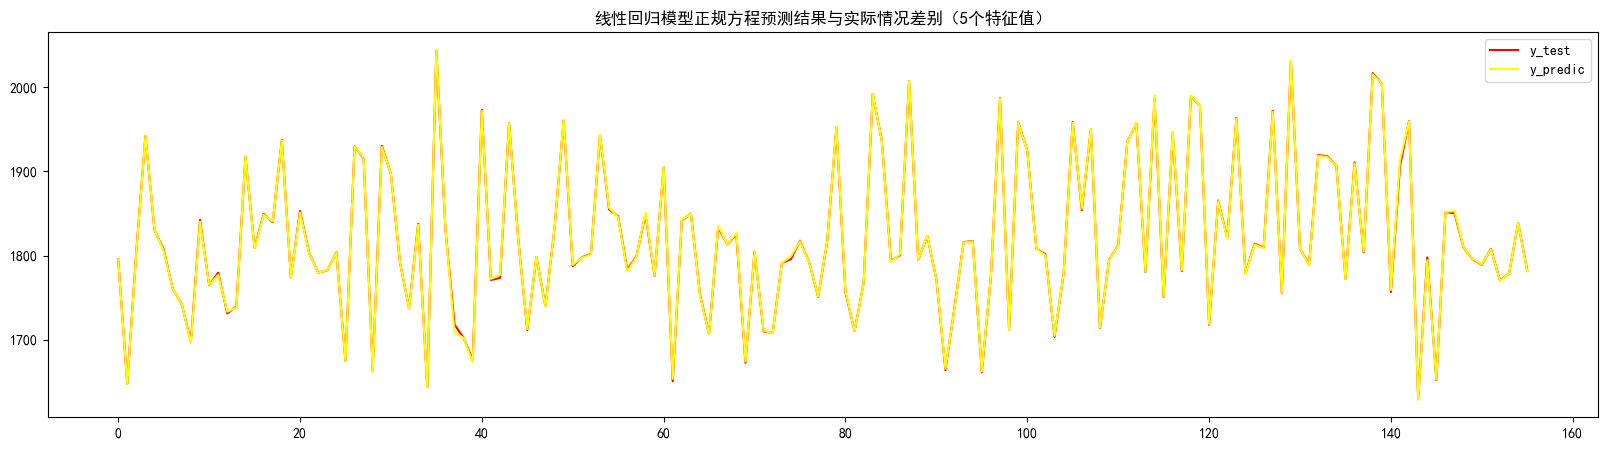

In [137]:
#可视化展示模型预测结果与实际情况的差别
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,x_test.shape[0]),y_test,color='red',label='y_test')
plt.plot(np.arange(0,x_test.shape[0]),y_predict,color='yellow',label='y_predic')
plt.title('线性回归模型正规方程预测结果与实际情况差别（5个特征值）')
plt.legend()

In [132]:
from sklearn.model_selection import train_test_split
# 筛选特征值和目标值
x=data[['Open','High','Low','Change(Pips)','Change(%)']]
#数据集划分
x_train, x_test, y_train, y_test = train_test_split(x, data.Close,random_state=22)
print("训练集的特征值：\n", x_train, x_train.shape)
print("测试集的特征值：\n", y_train, y_train.shape)

# 特征工程：标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)
print(x_test)

训练集的特征值：
         Open     High      Low  Change(Pips)  Change(%)
267  1812.49  1829.23  1787.05          1389       0.77
594  1977.15  1983.42  1947.40         -2915      -1.47
215  1917.19  1929.10  1895.19           963       0.50
587  1960.03  1964.62  1938.60         -1966      -1.00
199  1906.36  1921.06  1882.70         -1733      -0.91
..       ...      ...      ...           ...        ...
491  1928.03  1955.95  1920.84          2500       1.30
502  1854.94  1859.98  1830.72         -1843      -0.99
358  1739.46  1740.46  1720.91         -1622      -0.93
356  1737.56  1739.60  1733.90          -297      -0.17
132  1780.89  1787.49  1772.26           371       0.21

[466 rows x 5 columns] (466, 5)
测试集的特征值：
 267    1826.38
594    1948.00
215    1926.83
587    1940.37
199    1889.02
        ...   
491    1953.03
502    1836.51
358    1723.24
356    1734.59
132    1784.61
Name: Close, Length: 466, dtype: float64 (466,)
[[-4.89967972e-01 -5.25405376e-01 -4.30172258e-01  2.82877731e

In [224]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 


estimator = Ridge(alpha=0.5, max_iter=10000)
estimator.fit(x_train, y_train)

print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

岭回归-权重系数为：
 [61.36356705 17.00011925 15.94861775  9.52488584  2.68035889]
岭回归-偏置为：
 1837.917939914163
岭回归-均方误差为：
 2.039491963857132


In [188]:
#分别计算训练集和测试集的拟合优质
print('Traing set score:{:.2f}'.format(estimator.score(x_train,y_train)))
print('Test set score:{:.2f}'.format(estimator.score(x_test,y_test)))

Traing set score:1.00
Test set score:1.00


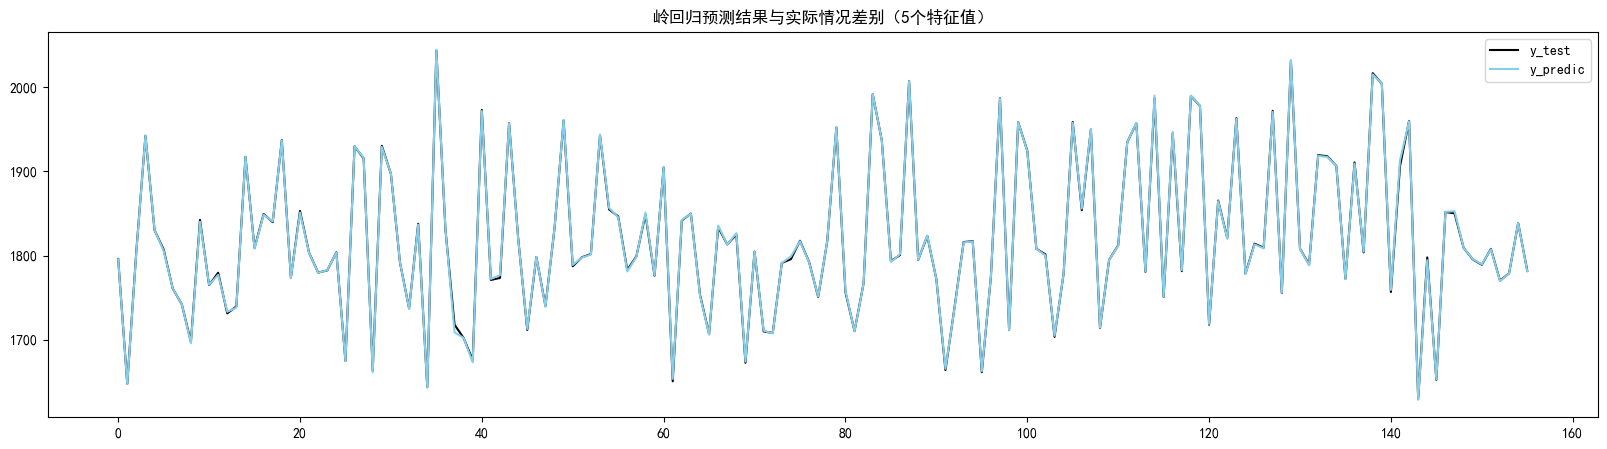

In [225]:
#可视化展示模型预测结果与实际情况的差别
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,x_test.shape[0]),y_test,color='black',label='y_test')
plt.plot(np.arange(0,x_test.shape[0]),y_predict,color='skyblue',label='y_predic')
plt.title('岭回归预测结果与实际情况差别（5个特征值）')
plt.legend()

# 模型调优

In [222]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 


estimator = Ridge(alpha=0.3, max_iter=10000)
estimator.fit(x_train, y_train)

print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

岭回归-权重系数为：
 [69.33317302 12.91614302 12.07947134 10.79939706  2.04928171]
岭回归-偏置为：
 1837.917939914163
岭回归-均方误差为：
 1.1746476003941775


In [223]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 


estimator = Ridge(alpha=0.1, max_iter=10000)
estimator.fit(x_train, y_train)

print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

岭回归-权重系数为：
 [83.01908625  5.86381722  5.46441218 13.01237126  0.94006866]
岭回归-偏置为：
 1837.917939914163
岭回归-均方误差为：
 0.24130963567639468


In [213]:
#保存岭回归正规方程模型
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
import joblib  

estimator = Ridge(alpha=0.1, max_iter=10000)
estimator.fit(x_train, y_train)

joblib.dump(estimator, "D:/学校/sai/2023年第二届全国大学生数据分析实践赛章程赛题(3)(1)/2023年B题/my_ridge.pkl")

print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

岭回归-权重系数为：
 [83.01908625  5.86381722  5.46441218 13.01237126  0.94006866]
岭回归-偏置为：
 1837.917939914163
岭回归-均方误差为：
 0.24130963567639468


In [214]:
#验证模型是否保存成功
estimator = joblib.load("my_ridge.pkl")

print("岭回归-权重系数为：\n", estimator.coef_)
print("岭回归-偏置为：\n", estimator.intercept_)

y_predict = estimator.predict(x_test)
#print("预测收盘价：\n", y_predict)
error = mean_squared_error(y_test, y_predict)
print("岭回归-均方误差为：\n", error)

岭回归-权重系数为：
 [83.01908625  5.86381722  5.46441218 13.01237126  0.94006866]
岭回归-偏置为：
 1837.917939914163
岭回归-均方误差为：
 0.24130963567639468


# 模型预测

In [176]:
#提取出最后四个月数据
pred_data=data.iloc[500:,1:]
pred_data= pred_data.drop('Close', axis=1) 
print(pred_data)
pred_data.to_excel('D:/学校/sai/2023年第二届全国大学生数据分析实践赛章程赛题(3)(1)/2023年B题/pred_data.xlsx', index=False)

        Open     High      Low  Change(Pips)  Change(%)  new_Change(Pips)
500  1858.95  1866.15  1850.20          -461      -0.25            -461.0
501  1854.15  1869.19  1843.57            78       0.04              79.0
502  1854.94  1859.98  1830.72         -1843      -0.99           -1843.0
503  1836.51  1845.12  1827.82          -228      -0.12            -229.0
504  1833.04  1843.46  1819.00           929       0.51             930.0
..       ...      ...      ...           ...        ...               ...
617  1909.47  1913.00  1893.16           -71      -0.04             -71.0
618  1908.71  1922.61  1900.57          1049       0.55            1049.0
619  1920.30  1920.30  1917.50          -259      -0.14            -260.0
620  1917.70  1930.50  1910.11           347       0.18             347.0
621  1921.07  1930.22  1920.34           858       0.45             858.0

[122 rows x 6 columns]


In [228]:
pred_data=pd.read_csv('future four month.csv')
pred_data= pred_data.drop('交易量', axis=1) 
pred_data= pred_data.drop('涨跌幅', axis=1)  
pred_data['Change(Pips)'] = (pred_data['Close'] - pred_data['Open'])*100
pred_data['Change(%)'] = (pred_data['Close'] - pred_data['Open'])/data['Open']*100
pred_data['Change(%)'] = [round(x, 2) for x in pred_data['Change(%)']] #保留两位小数
print(pred_data)
pred_data1= pred_data.drop('Close', axis=1) 
pred_data1= pred_data1.drop('Date', axis=1) 

          Date   Close    Open    High     Low  Change(Pips)  Change(%)
0    2023/11/3  1999.2  1993.5  2011.9  1989.3         570.0       0.32
1    2023/11/2  1993.5  1992.0  1999.2  1986.3         150.0       0.08
2    2023/11/1  1987.5  1993.3  2005.9  1978.2        -580.0      -0.32
3   2023/10/31  1994.3  2005.6  2017.7  1987.4       -1130.0      -0.63
4   2023/10/30  2005.6  2013.5  2016.8  1999.7        -790.0      -0.44
..         ...     ...     ...     ...     ...           ...        ...
84   2023/7/11  1937.1  1930.8  1944.5  1929.8         630.0       0.36
85   2023/7/10  1931.0  1930.7  1933.7  1918.0          30.0       0.02
86    2023/7/7  1932.5  1916.6  1941.1  1915.4        1590.0       0.91
87    2023/7/6  1915.4  1922.4  1934.0  1908.5        -700.0      -0.40
88    2023/7/5  1927.1  1929.1  1942.9  1922.1        -200.0      -0.11

[89 rows x 7 columns]


In [229]:
from joblib import load  
# 特征工程：标准化
from sklearn.preprocessing import StandardScaler
transfer = StandardScaler()
pred_data1 = transfer.fit_transform(pred_data1)
model = load('my_ridge.pkl')
predictions = model.predict(pred_data1)
print(predictions)

[1961.25345362 1951.06438761 1945.44910674 1968.09249805 1990.081485
 1942.10806789 1932.00460247 1918.94148216 1909.13516051 1914.59329712
 1949.30692834 1899.98635435 1858.42117211 1812.18366674 1817.7020476
 1762.80435489 1695.89447571 1684.3968506  1670.00455045 1642.14187751
 1585.76469926 1573.42260321 1579.10012366 1592.96342195 1622.27887185
 1668.44924785 1694.93578549 1739.48373873 1793.6751985  1825.90315466
 1832.23603399 1837.04946417 1873.71334438 1859.6418223  1848.52887108
 1825.35246097 1804.51286272 1809.8838706  1824.64519113 1838.43637264
 1833.9366903  1831.18505887 1843.076392   1871.4743598  1885.02629521
 1888.25660157 1890.05727296 1892.27498083 1896.1498954  1865.32887134
 1838.67781168 1829.96273387 1839.34281816 1820.82946945 1789.55012033
 1779.39075058 1772.88393717 1775.40865533 1802.35501047 1817.93429393
 1835.38266042 1839.59880624 1846.62735331 1860.60177142 1885.21874857
 1905.17845405 1903.06674499 1895.93433997 1923.76541864 1946.00942974
 1976.314

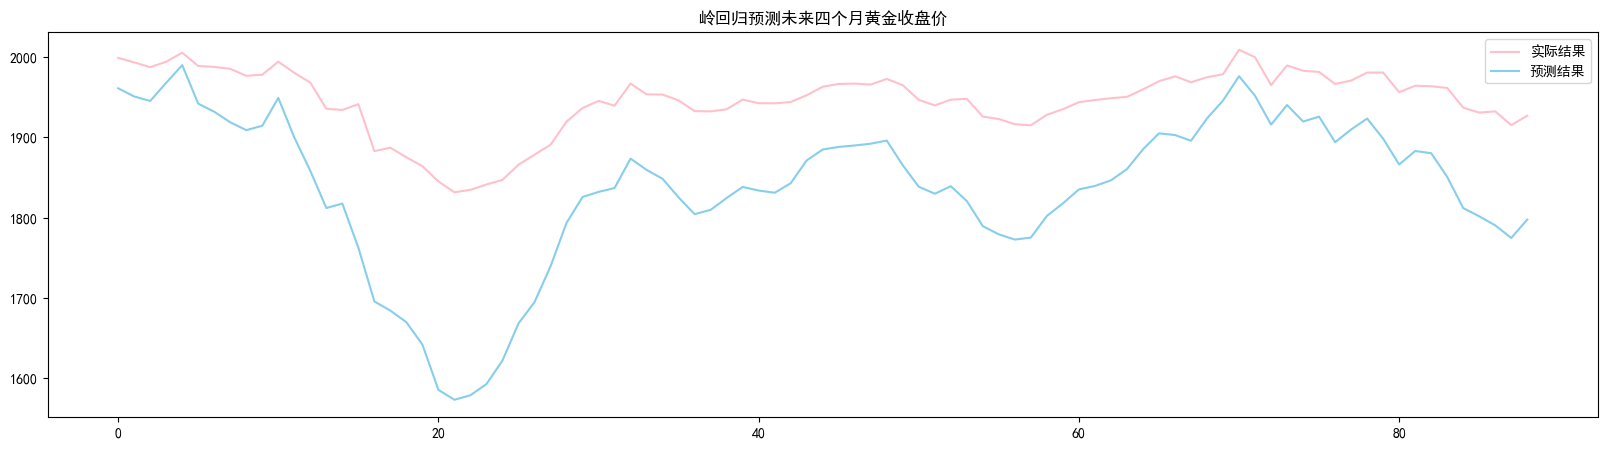

In [230]:
#可视化展示模型预测结果与实际情况的差别
plt.rcParams['font.sans-serif']=['Simhei'] #设置中文字体
plt.figure(figsize=(20,5))
plt.plot(np.arange(0,pred_data1.shape[0]),pred_data['Close'],color='pink',label='实际结果')
plt.plot(np.arange(0,pred_data1.shape[0]),predictions,color='skyblue',label='预测结果')
plt.title('岭回归预测未来四个月黄金收盘价')
plt.legend()